In [1]:
import numpy as np
import cv2
import pandas as pd
import matplotlib as plt
import time
import PIL
import os
import skimage as ski
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

### PREPARACIÓN DE LOS DATOS A UTILIZAR

**Primero de todo seleccionaremos el conjunto de test y el conjunto de train, para poder empezar a trabajar**

In [2]:
training_files = os.listdir("./DATABASE/training_data/images")
test_files = os.listdir("./DATABASE/test_data_images")

training_files = training_files[0:300]  # TRAIN
test_files = test_files[0:300]  # TRAIN

train_imgs = []
for archivo in training_files:
    path = 'DATABASE/training_data/images/' + archivo
    image = ski.io.imread(path, as_gray=True)  # LEO CADA IMAGEN EN GRIS
    train_imgs.append(image)  # GUARDO LOS VALORES DE CADA IMAGEN EN UN ARRAY

test_imgs = []
for archivo in test_files:
    path = 'DATABASE/test_data_images/' + archivo
    image = ski.io.imread(path, as_gray=True)  # LEO CADA IMAGEN EN GRIS
    test_imgs.append(image)



**Extraer coordenadas de piscinas de cada archivo LABEL correspondiente a cada imagen de TRAIN**

Las piscinas en los archivos LABEL corresponden al número 2, mientras que los coches corresponden al número 1, vamos a crear una funcion que dado un número de imagen muestre esa misma imagen con las piscinas marcadas en caso de tener.

Coordenadas de las piscinas en la imagen 000000010:


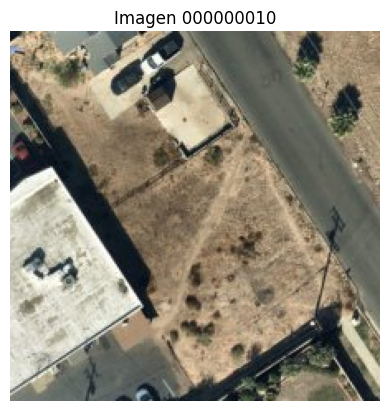

Coordenadas de las piscinas en la imagen 000000011:


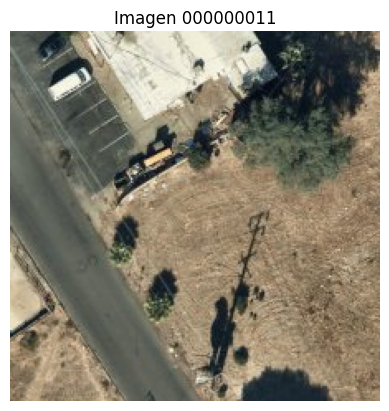

Coordenadas de las piscinas en la imagen 000000012:
Piscina 1: xmin=149.53, ymin=196.11, xmax=193.97, ymax=224.0
Piscina 2: xmin=120.24, ymin=212.77, xmax=158.87, ymax=224.0


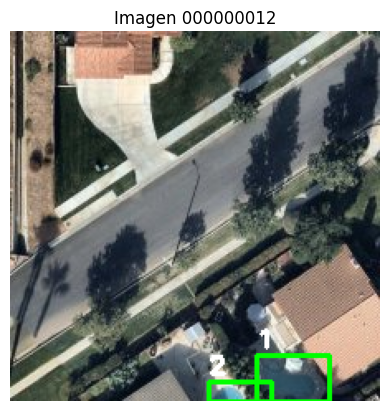

Coordenadas de las piscinas en la imagen 000000013:
Piscina 1: xmin=37.53, ymin=196.11, xmax=81.97, ymax=224.0
Piscina 2: xmin=8.24, ymin=212.77, xmax=46.87, ymax=224.0


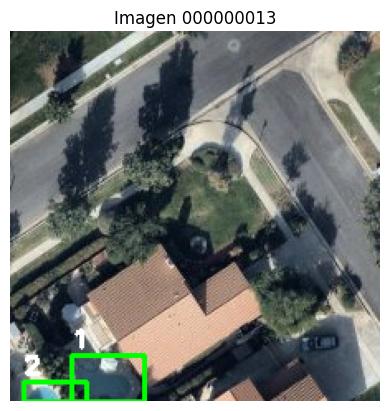

Coordenadas de las piscinas en la imagen 000000014:
Piscina 1: xmin=149.53, ymin=84.11, xmax=193.98, ymax=128.56
Piscina 2: xmin=117.33, ymin=100.77, xmax=161.78, ymax=145.21
Piscina 3: xmin=153.97, ymin=181.82, xmax=198.42, ymax=224.0
Piscina 4: xmin=211.71, ymin=156.41, xmax=224.0, ymax=196.16


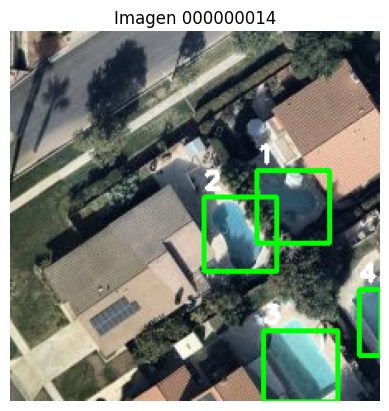

Coordenadas de las piscinas en la imagen 000000015:
Piscina 1: xmin=37.53, ymin=84.11, xmax=81.98, ymax=128.56
Piscina 2: xmin=5.33, ymin=100.77, xmax=49.78, ymax=145.21
Piscina 3: xmin=41.97, ymin=181.82, xmax=86.42, ymax=224.0
Piscina 4: xmin=99.71, ymin=154.06, xmax=144.16, ymax=198.51


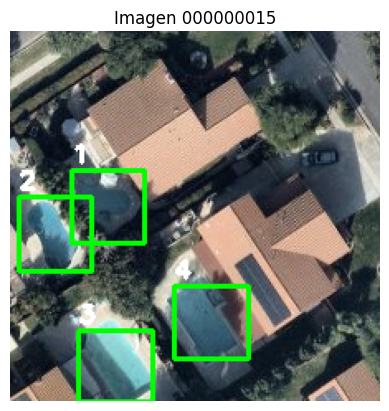

Coordenadas de las piscinas en la imagen 000000016:


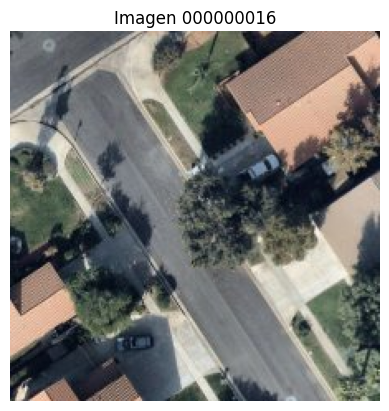

Coordenadas de las piscinas en la imagen 000000017:
Piscina 1: xmin=167.73, ymin=87.3, xmax=212.18, ymax=131.74
Piscina 2: xmin=122.21, ymin=0.0, xmax=166.65, ymax=39.58


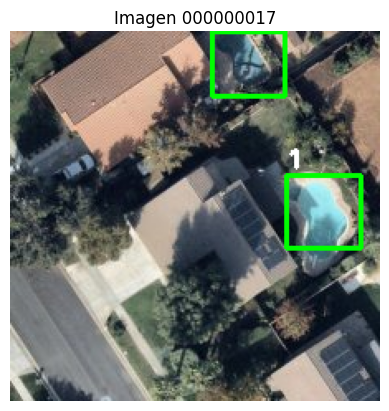

Coordenadas de las piscinas en la imagen 000000018:
Piscina 1: xmin=0.0, ymin=154.06, xmax=32.15, ymax=198.51


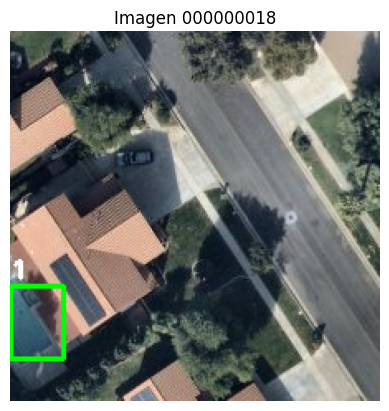

Coordenadas de las piscinas en la imagen 000000019:
Piscina 1: xmin=167.88, ymin=0.0, xmax=212.04, ymax=19.74


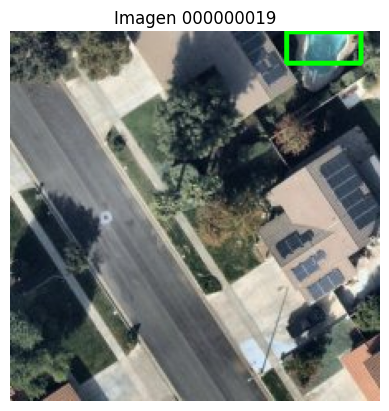

In [3]:
# Función para parsear el archivo XML y obtener las coordenadas
def parse_xml(xml_file):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        pool_coordinates = []
        
        for obj in root.findall('object'):
            name = obj.find('name').text
            if name == '2':  # Verifica si es una piscina
                bndbox = obj.find('bndbox')
                xmin = float(bndbox.find('xmin').text)
                ymin = float(bndbox.find('ymin').text)
                xmax = float(bndbox.find('xmax').text)
                ymax = float(bndbox.find('ymax').text)
                pool_coordinates.append((xmin, ymin, xmax, ymax))
        
        return pool_coordinates

# Función para dibujar los cuadrados en la imagen
def draw_boxes(image, coordinates):
    for i, (xmin, ymin, xmax, ymax) in enumerate(coordinates, 1):
        cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (0, 255, 0), 2)
        # Agregar el número de piscina encima del cuadrado
        cv2.putText(image, str(i), (int(xmin), int(ymin) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    return image


def draw_boxes_on_image(image_number):
    # Obtener la ruta de la imagen y del archivo XML
    image_path = f'DATABASE/training_data/images/{image_number}.jpg'
    xml_path = f'DATABASE/training_data/labels/{image_number}.xml'

    # Cargar la imagen
    image = cv2.imread(image_path)

    # Verificar si la imagen existe
    if image is None:
        print(f"La imagen {image_number} no pudo ser cargada. Verifica la ruta: {image_path}")
        return

    # Verificar si el archivo XML existe
    if not os.path.exists(xml_path):
        print(f"El archivo XML para la imagen {image_number} no existe. Verifica la ruta: {xml_path}")
        return

    # Obtener las coordenadas del archivo XML
    coordinates = parse_xml(xml_path)

    # Mostrar las coordenadas de cada piscina
    print(f"Coordenadas de las piscinas en la imagen {image_number}:")
    for i, (xmin, ymin, xmax, ymax) in enumerate(coordinates, 1):
        print(f"Piscina {i}: xmin={xmin}, ymin={ymin}, xmax={xmax}, ymax={ymax}")

    # Dibujar los cuadrados en la imagen
    image_with_boxes = draw_boxes(image, coordinates)

    # Convertir la imagen a RGB (matplotlib espera RGB)
    image_with_boxes_rgb = cv2.cvtColor(image_with_boxes, cv2.COLOR_BGR2RGB)

    # Mostrar la imagen con los cuadrados dibujados
    plt.imshow(image_with_boxes_rgb)
    plt.axis('off')
    plt.title(f'Imagen {image_number}')
    plt.show()

# Número de la imagen como cadena
image_number = '000000013'

# Llamar a la función para dibujar los cuadrados en la imagen y mostrarla
for i in range(10,20):
    draw_boxes_on_image('0000000'+ str(i))



In [ ]:
"""
yolo implementar desde 0 ---------- GUILLE
findtunning coger red pre entrenada y entrenarla de nuevo

2 metodos clasicos segmentación , buscar casas cerca, jardines --------- Eric Wenpeng
detección de contornos

ssd extra

VAMOS llegamos al 7 u 8

"""


